📌 Pouca gente faz — recrutador adora

Use para:

validar regras de negócio

checar outliers óbvios

duplicidades

ranges inválidos (ex: valores negativos)

Exemplos:

pedidos com valor < 0

datas no futuro

usuários duplicados

👉 Aqui você transforma suspeitas em regras.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.titlesize'] = 14

In [3]:
path_data_not_null = "../data/processed/dataset_not_null.csv"
path_data_not_null_features = "../data/processed/dataset_not_null_with_features.csv"

In [4]:
df_not_null = pd.read_csv(path_data_not_null)
df_not_null_features = pd.read_csv(path_data_not_null_features)

In [5]:
df_not_null.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,41.915689,-87.634600,member
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,41.864221,-87.623439,casual
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195.0,State St & Randolph St,44.0,41.884641,-87.619549,41.884971,-87.627574,casual
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81.0,State St & Kinzie St,47.0,41.884093,-87.629639,41.889583,-87.627540,casual
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,41.903002,-87.683844,casual


In [6]:
df_not_null_features.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,round_trip,ride_duration,ride_duration_minutes,week_day,is_weekend,hour_start,hour_end,distance_km,distance_m
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,...,member,different_place,0 days 00:09:37,9.616667,Thursday,False,18,18,1.885153,1885.152542
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,...,casual,same_place,0 days 01:08:47,68.783333,Thursday,False,18,19,0.026647,26.647146
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195.0,State St & Randolph St,44.0,41.884641,-87.619549,...,casual,different_place,0 days 02:08:53,128.883333,Wednesday,False,19,21,0.665325,665.324586
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81.0,State St & Kinzie St,47.0,41.884093,-87.629639,...,casual,different_place,0 days 00:48:04,48.066667,Thursday,False,12,12,0.634686,634.686478
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,...,casual,same_place,0 days 00:10:47,10.783333,Thursday,False,16,16,0.006598,6.597641


Here , we going to use the df_not_null_features , because some of the new columns we'll use for our analysis

In [7]:
df = df_not_null_features.copy()

In [8]:
df['started_at'] = pd.to_datetime(df['started_at'] , format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'] , format='%Y-%m-%d %H:%M:%S')

In [9]:
df.describe()

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,ride_duration_minutes,hour_start,hour_end,distance_km,distance_m
count,609010,609010,609010.000000,609010.000000,609010.000000,609010.000000,609010.000000,609010.000000,609010.000000,609010.000000,609010.000000,608087.000000,608087.000000
mean,2020-08-16 21:52:48.044648,2020-08-16 22:22:06.920343,224.923331,225.541400,41.905925,-87.643954,41.906175,-87.644164,29.314595,14.435838,14.656876,2.306110,2306.109879
min,2020-08-01 00:00:01,2020-08-01 00:04:41,2.000000,2.000000,41.691661,-87.774704,41.691592,-87.774704,-10.250000,0.000000,0.000000,0.000000,0.000000
25%,2020-08-08 19:53:31.500000,2020-08-08 20:26:20,96.000000,97.000000,41.883690,-87.656853,41.883984,-87.656959,8.750000,11.000000,12.000000,0.868442,868.441501
50%,2020-08-16 18:09:10.500000,2020-08-16 18:41:09.500000,195.000000,196.000000,41.902308,-87.639904,41.902924,-87.641066,15.866667,15.000000,15.000000,1.756984,1756.983731
75%,2020-08-24 08:56:14.500000,2020-08-24 09:20:12.250000,312.000000,312.000000,41.931248,-87.626804,41.931320,-87.627305,28.600000,18.000000,18.000000,3.199328,3199.328404
max,2020-08-31 23:58:55,2020-09-02 21:21:53,700.000000,700.000000,42.064854,-87.548436,42.064854,-87.548324,40846.366667,23.000000,23.000000,28.579031,28579.030871
std,NaN,NaN,161.519114,161.446523,0.041199,0.024715,0.041339,0.024844,242.781433,4.682238,4.813471,2.110185,2110.184552


In [10]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'round_trip', 'ride_duration', 'ride_duration_minutes',
       'week_day', 'is_weekend', 'hour_start', 'hour_end', 'distance_km',
       'distance_m'],
      dtype='str')

## Data Quality

### validar regras de negócio

The are no businesse rules for this example to see

### checar outliers óbvios

In [11]:
def outliers(df):
    # Simple Detection Outliers (Using IQR for distance and time)
    print("=== 🚨 OUTLIERS (IQR) ===")
    for col in ['ride_duration_minutes', 'distance_km']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[df[col] > limite_superior].shape[0]
        print(f"{col}: {outliers} lines above {limite_superior:.2f} (Superior Limit)")
    print("")

def get_outliers(df):
    print("=== 🚨 GETTING OUTLIERS (IQR) ===")
    # Fisrt of all , we create a new column called "is_outlier" to verify wich line is or no an outliers
    df['is_outlier'] = False
    
    for col in ['ride_duration_minutes', 'distance_km']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        limite_superior = Q3 + 1.5 * IQR
        limite_inferior = Q1 - 1.5 * IQR # É boa prática checar o inferior também
        
        # Identifica as linhas que são outliers nesta coluna específica
        outliers_mask = (df[col] > limite_superior) | (df[col] < limite_inferior)
        
        # Atualiza a coluna de sinalização usando 'OR' para acumular outliers de várias colunas
        df['is_outlier'] = df['is_outlier'] | outliers_mask
        
        qtd = df[outliers_mask].shape[0]
        print(f"{col}: {qtd} linhas detectadas como outliers.")
        
    return df

In [12]:
def plotar_distribuicao(df, coluna):
    """
    Recebe um DataFrame e o nome da coluna para plotar Boxplot e Histograma.
    """
    # Criando a figura com dois subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histograma com curva KDE
    sns.histplot(df[coluna], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histograma: {coluna}')
    
    # Boxplot
    sns.boxplot(x=df[coluna], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot: {coluna}')
    
    plt.tight_layout()
    plt.show()

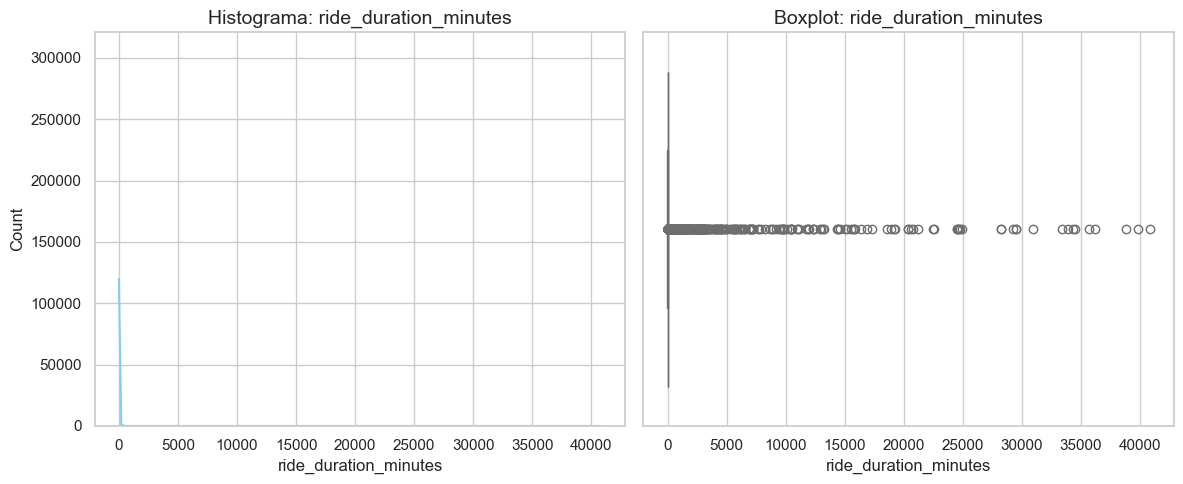

In [13]:
plotar_distribuicao(df , "ride_duration_minutes")

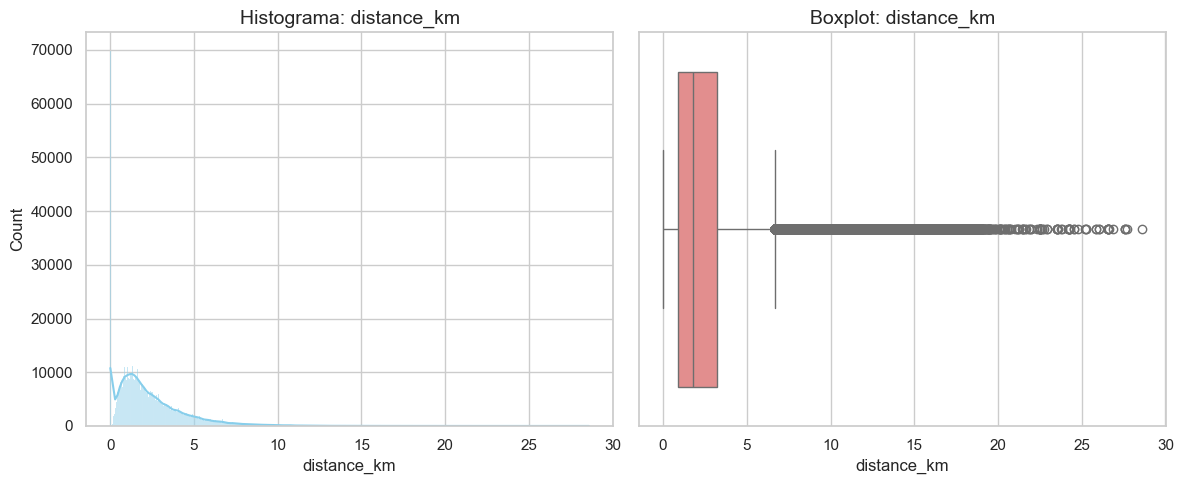

In [14]:
plotar_distribuicao(df,"distance_km")

In [15]:
df_temp = get_outliers(df)

=== 🚨 GETTING OUTLIERS (IQR) ===
ride_duration_minutes: 50475 linhas detectadas como outliers.
distance_km: 25621 linhas detectadas como outliers.


Here we have a "problem" , when user starts in a station and end in the same station we can't secure the real ride distace

In [16]:
df[ df["round_trip"] == "same_place"][["start_station_name","start_lat","start_lng","end_station_name","end_lat","end_lng","distance_km"]].head()

,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,distance_km
1,Michigan Ave & 14th St,41.864379,-87.623681,Michigan Ave & 14th St,41.864221,-87.623439,0.026647
4,Leavitt St & Division St,41.902989,-87.683767,Leavitt St & Division St,41.903002,-87.683844,0.006598
5,Leavitt St & Division St,41.903015,-87.683731,Leavitt St & Division St,41.903092,-87.683628,0.012079
21,Milwaukee Ave & Grand Ave,41.891739,-87.648420,Milwaukee Ave & Grand Ave,41.891635,-87.648259,1.062208
32,Warren Park West,42.001766,-87.688802,Warren Park West,42.001793,-87.688821,5.359861


In this case we only will remove the outliers where round_trip == "different_place"

In [17]:
def get_outliers(df):
    print("=== 🚨 GETTING OUTLIERS (IQR) - ONLY FOR DIFFERENT PLACES ===")
    
    # Criamos a coluna de sinalização inicializada como False
    df['is_outlier'] = False
    
    for col in ['ride_duration_minutes', 'distance_km']:
        # 1. Calculamos as estatísticas APENAS sobre os dados de "different_place"
        # Isso garante que o limite seja justo para esse grupo
        subset = df[df['round_trip'] == 'different_place'][col]
        
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        
        limite_superior = Q3 + 1.5 * IQR
        limite_inferior = Q1 - 1.5 * IQR
        
        # 2. Criamos a máscara com a condição adicional:
        # Deve ser outlier E deve ser "different_place"
        outliers_mask = (
            (df['round_trip'] == 'different_place') & 
            ((df[col] > limite_superior) | (df[col] < limite_inferior))
        )
        
        # 3. Atualizamos a flag global
        df['is_outlier'] = df['is_outlier'] | outliers_mask
        
        qtd = df[outliers_mask].shape[0]
        print(f"{col}: {qtd} linhas detectadas como outliers (apenas em 'different_place').")
        
    return df

In [18]:
df_temp = get_outliers(df)

=== 🚨 GETTING OUTLIERS (IQR) - ONLY FOR DIFFERENT PLACES ===
ride_duration_minutes: 36767 linhas detectadas como outliers (apenas em 'different_place').
distance_km: 22782 linhas detectadas como outliers (apenas em 'different_place').


In [19]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,round_trip,ride_duration,ride_duration_minutes,week_day,is_weekend,hour_start,hour_end,distance_km,distance_m,is_outlier
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,...,different_place,0 days 00:09:37,9.616667,Thursday,False,18,18,1.885153,1885.152542,False
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,...,same_place,0 days 01:08:47,68.783333,Thursday,False,18,19,0.026647,26.647146,False
2,67DC1D133E8B5816,electric_bike,2020-08-26 19:44:14,2020-08-26 21:53:07,Columbus Dr & Randolph St,195.0,State St & Randolph St,44.0,41.884641,-87.619549,...,different_place,0 days 02:08:53,128.883333,Wednesday,False,19,21,0.665325,665.324586,True
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81.0,State St & Kinzie St,47.0,41.884093,-87.629639,...,different_place,0 days 00:48:04,48.066667,Thursday,False,12,12,0.634686,634.686478,False
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,...,same_place,0 days 00:10:47,10.783333,Thursday,False,16,16,0.006598,6.597641,False


There are some details in this outliers that we must to "understand":

1) We already know that we can't consider round_trip == "same_place" , because we can't get the real distance of the trip
2) But , we have another problem: imagine in a weekend a lot of people can use the bike for a long time to go to the groccery store , café or other places. We really can consider these user as a outlier , if it , for example , trip do the grocery and stayed for 3 hours, despite it triped for 1 kilometer?

This is a good discution! For our example i will remove outliers in two ways: one for "same_place" and other for "different_place"

In [20]:
def get_outliers(df):
    print("=== 🚨 GETTING OUTLIERS (IQR) - ONLY FOR DIFFERENT PLACES ===")
    
    # Criamos a coluna de sinalização inicializada como False
    df['is_outlier'] = False
    
    for col in ['ride_duration_minutes', 'distance_km']:
        # 1. Calculamos as estatísticas APENAS sobre os dados de "different_place"
        # Isso garante que o limite seja justo para esse grupo
        subset = df[df['round_trip'] == 'different_place'][col]
        
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        
        limite_superior = Q3 + 1.5 * IQR
        limite_inferior = Q1 - 1.5 * IQR
        
        # 2. Criamos a máscara com a condição adicional:
        # Deve ser outlier E deve ser "different_place"
        outliers_mask = (
            (df['round_trip'] == 'different_place') & 
            ((df[col] > limite_superior) | (df[col] < limite_inferior))
        )
        
        # 3. Atualizamos a flag global
        df['is_outlier'] = df['is_outlier'] | outliers_mask
        
        qtd = df[outliers_mask].shape[0]
        print(f"{col}: {qtd} linhas detectadas como outliers (apenas em 'different_place').")

    for col in ['ride_duration_minutes', 'distance_km']:
        # 1. Calculamos as estatísticas APENAS sobre os dados de "same_place"
        # Isso garante que o limite seja justo para esse grupo
        subset = df[df['round_trip'] == 'same_place'][col]
        
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        
        limite_superior = Q3 + 1.5 * IQR
        limite_inferior = Q1 - 1.5 * IQR
        
        # 2. Criamos a máscara com a condição adicional:
        # Deve ser outlier E deve ser "different_place"
        outliers_mask = (
            (df['round_trip'] == 'same_place') & 
            ((df[col] > limite_superior) | (df[col] < limite_inferior))
        )
        
        # 3. Atualizamos a flag global
        df['is_outlier'] = df['is_outlier'] | outliers_mask
        
        qtd = df[outliers_mask].shape[0]
        print(f"{col}: {qtd} linhas detectadas como outliers (apenas em 'same_place').")
        
    return df

In [21]:
df = get_outliers(df)

=== 🚨 GETTING OUTLIERS (IQR) - ONLY FOR DIFFERENT PLACES ===
ride_duration_minutes: 36767 linhas detectadas como outliers (apenas em 'different_place').
distance_km: 22782 linhas detectadas como outliers (apenas em 'different_place').
ride_duration_minutes: 3204 linhas detectadas como outliers (apenas em 'same_place').
distance_km: 2949 linhas detectadas como outliers (apenas em 'same_place').


In [22]:
df = df[df['is_outlier'] == False].drop(columns=['is_outlier'])

In [23]:
lines = df.shape[0]
columns = df.shape[1]
print(f"{lines} lines | {columns} columns")

545056 lines | 22 columns


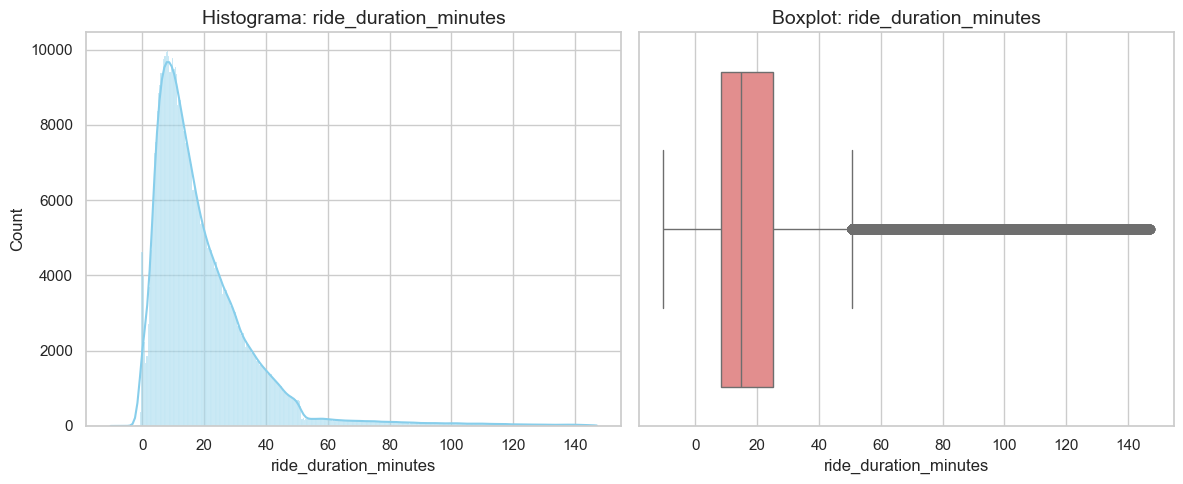

In [24]:
plotar_distribuicao(df , "ride_duration_minutes")

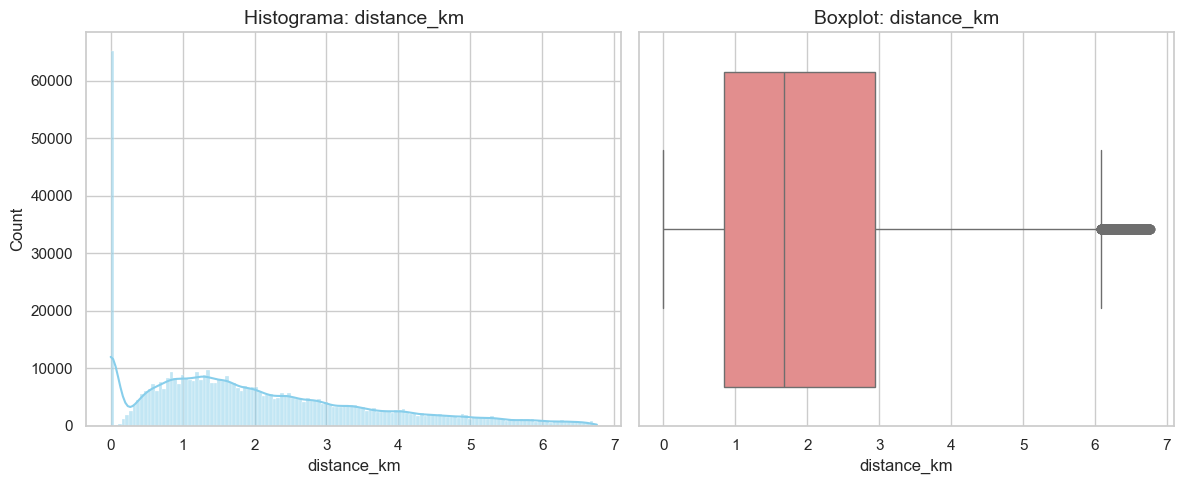

In [25]:
plotar_distribuicao(df,"distance_km")

### duplicidades

In [26]:
df = df.drop_duplicates(subset="ride_id")

### ranges inválidos

In [27]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,round_trip,ride_duration,ride_duration_minutes,week_day,is_weekend,hour_start,hour_end,distance_km,distance_m
0,322BD23D287743ED,docked_bike,2020-08-20 18:08:14,2020-08-20 18:17:51,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Lincoln Ave,141.0,41.932588,-87.636427,...,member,different_place,0 days 00:09:37,9.616667,Thursday,False,18,18,1.885153,1885.152542
1,2A3AEF1AB9054D8B,electric_bike,2020-08-27 18:46:04,2020-08-27 19:54:51,Michigan Ave & 14th St,168.0,Michigan Ave & 14th St,168.0,41.864379,-87.623681,...,casual,same_place,0 days 01:08:47,68.783333,Thursday,False,18,19,0.026647,26.647146
3,C79FBBD412E578A7,electric_bike,2020-08-27 12:05:41,2020-08-27 12:53:45,Daley Center Plaza,81.0,State St & Kinzie St,47.0,41.884093,-87.629639,...,casual,different_place,0 days 00:48:04,48.066667,Thursday,False,12,12,0.634686,634.686478
4,13814D3D661ECADB,electric_bike,2020-08-27 16:49:02,2020-08-27 16:59:49,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.902989,-87.683767,...,casual,same_place,0 days 00:10:47,10.783333,Thursday,False,16,16,0.006598,6.597641
5,56349A5A42F0AE51,electric_bike,2020-08-27 17:26:23,2020-08-27 18:07:50,Leavitt St & Division St,658.0,Leavitt St & Division St,658.0,41.903015,-87.683731,...,casual,same_place,0 days 00:41:27,41.450000,Thursday,False,17,18,0.012079,12.079038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609005,7CDE93FDA3718712,electric_bike,2020-08-03 08:28:35,2020-08-03 08:30:12,Clark St & North Ave,126.0,Clark St & North Ave,126.0,41.911900,-87.632000,...,member,same_place,0 days 00:01:37,1.616667,Monday,False,8,8,4.413396,4413.396271
609006,7F5C97BB1A706250,electric_bike,2020-08-19 00:02:06,2020-08-19 00:38:01,Lakefront Trail & Bryn Mawr Ave,459.0,Lakefront Trail & Bryn Mawr Ave,459.0,41.984000,-87.652400,...,member,same_place,0 days 00:35:55,35.916667,Wednesday,False,0,0,1.903270,1903.269847
609007,0309E1AEBB26485B,electric_bike,2020-08-30 07:32:34,2020-08-30 07:49:39,Damen Ave & Foster Ave,464.0,Damen Ave & Foster Ave,464.0,41.975600,-87.679500,...,member,same_place,0 days 00:17:05,17.083333,Sunday,True,7,7,0.455501,455.501323
609008,2D16387409B37309,electric_bike,2020-08-17 17:33:33,2020-08-17 17:38:16,Sheffield Ave & Wellington Ave,115.0,Sheffield Ave & Wellington Ave,115.0,41.936300,-87.652600,...,member,same_place,0 days 00:04:43,4.716667,Monday,False,17,17,2.217067,2217.066887


In [28]:
df.describe()

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,ride_duration_minutes,hour_start,hour_end,distance_km,distance_m
count,545056,545056,545056.000000,545056.000000,545056.000000,545056.000000,545056.000000,545056.000000,545056.000000,545056.000000,545056.000000,544198.000000,544198.000000
mean,2020-08-16 22:36:02.519623,2020-08-16 22:55:24.564731,225.226694,225.894404,41.906506,-87.644477,41.906716,-87.644710,19.367418,14.436118,14.621450,2.019845,2019.845327
min,2020-08-01 00:00:01,2020-08-01 00:04:41,2.000000,2.000000,41.691661,-87.774704,41.691592,-87.774704,-10.250000,0.000000,0.000000,0.000000,0.000000
25%,2020-08-08 20:30:58.250000,2020-08-08 20:52:44.750000,99.000000,99.000000,41.884114,-87.657030,41.884241,-87.658139,8.350000,11.000000,12.000000,0.834712,834.712354
50%,2020-08-16 18:53:48.500000,2020-08-16 19:17:48,196.000000,197.000000,41.902973,-87.641170,41.902973,-87.641823,14.766667,15.000000,15.000000,1.669913,1669.913301
75%,2020-08-24 11:00:50.500000,2020-08-24 11:18:59.500000,312.000000,312.000000,41.931320,-87.627754,41.931320,-87.627820,25.266667,18.000000,18.000000,2.936291,2936.290747
max,2020-08-31 23:58:55,2020-09-01 01:42:28,700.000000,700.000000,42.064854,-87.548436,42.064854,-87.548324,147.000000,23.000000,23.000000,6.759760,6759.759605
std,NaN,NaN,160.703616,160.545877,0.040600,0.024479,0.040712,0.024590,17.367346,4.694589,4.792397,1.580546,1580.545575


In [29]:
erros_trip = df[df['started_at'] > df['ended_at']]

In [30]:
print(f"{erros_trip.shape[0]} line where started_at > ended_at")

2655 line where started_at > ended_at


In [31]:
df = df[df['started_at'] <= df['ended_at']]

### Exportar CSV

In [32]:
df.to_csv("../data/processed/dataset_not_null_features_removed_outliers" , index=False)

## Análise estatística inicial

In [33]:
def analise_estatistica_completa(df):
    print("=== 📊 SUMMARY ===")
    print(f"Lines: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}\n")

    # 1. Verifing null values
    print("=== 🔍 NULL VALUES ===")
    nulls = df.isnull().sum()
    print(nulls[nulls > 0] if nulls.any() else "Any null value founded.", "\n")

    # 2. Numerical Variables Analysis
    # (distance, duration, hours)
    cols_num = ['ride_duration_minutes', 'distance_km', 'distance_m', 'hour_start', 'hour_end']
    print("=== 📈 NUMERICAL STATISTICS ===")
    resumo_num = df[cols_num].describe().T
    # Adding median
    resumo_num['median'] = df[cols_num].median()
    print(resumo_num[['count', 'mean', 'std', 'min', 'median', 'max']], "\n")

    # 3. Categorical Variable Analysis
    cols_cat = ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name', 'week_day','round_trip']
    print("=== 🔠 CATEGORICAL ANALYSIS (Top 3 Values) ===")
    for col in cols_cat:
        top_values = df[col].value_counts().head(3)
        percent = (top_values / len(df) * 100).round(2)
        print(f"Column: {col}")
        for val, count in top_values.items():
            print(f"  - {val}: {count} ({percent[val]}%)")
    print("")

    # 4. Bools Variable Analysis
    cols_bool = ['is_weekend']
    print("=== 🚩 BOOLS DISTRIBUTION ===")
    for col in cols_bool:
        dist = df[col].value_counts(normalize=True) * 100
        print(f"{col}: {dist.get(True, 0):.2f}% Sim | {dist.get(False, 0):.2f}% Não")
    print("")

    # 5. Simple Detection Outliers (Using IQR for distance and time)
    print("=== 🚨 OUTLIERS (IQR) ===")
    for col in ['ride_duration_minutes', 'distance_km']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[df[col] > limite_superior].shape[0]
        print(f"{col}: {outliers} lines above {limite_superior:.2f} (Superior Limit)")
    print("")
    
    print("*" * 70)
    print("")

    # 6. Business Insight: round_trip and duration/distance
    print("\n🎯 INSIGHT: BEHAVIOR FOR ROUND TRIP (Mean):")
    # Agrupa por round_trip para ver a diferença de duração e distância
    insight_trip = df.groupby('round_trip')[['ride_duration_minutes', 'distance_km']].mean().round(2)
    print(insight_trip)
    print("")

    # 7. Business Insight: round_trip and duration/distance
    print("\n🎯 INSIGHT: MEMBER FOR ROUND TRIP (Mean):")
    # Agrupa por round_trip para ver a diferença de duração e distância
    insight_trip = df.groupby('member_casual')[['ride_duration_minutes', 'distance_km']].mean().round(2)
    print(insight_trip)
    print("")

In [34]:
analise_estatistica_completa(df)

=== 📊 SUMMARY ===
Lines: 542401
Columns: 22

=== 🔍 NULL VALUES ===
distance_km    856
distance_m     856
dtype: int64 

=== 📈 NUMERICAL STATISTICS ===
                          count         mean          std  min       median  \
ride_duration_minutes  542401.0    19.463460    17.355304  0.0    14.833333   
distance_km            541545.0     2.019751     1.580550  0.0     1.669219   
distance_m             541545.0  2019.751334  1580.549799  0.0  1669.219428   
hour_start             542401.0    14.432866     4.697904  0.0    15.000000   
hour_end               542401.0    14.619130     4.796198  0.0    15.000000   

                               max  
ride_duration_minutes   147.000000  
distance_km               6.759760  
distance_m             6759.759605  
hour_start               23.000000  
hour_end                 23.000000   

=== 🔠 CATEGORICAL ANALYSIS (Top 3 Values) ===
Column: rideable_type
  - docked_bike: 494126 (91.1%)
  - electric_bike: 48275 (8.9%)
Column: member_cas

## Análise visual Geral

In [35]:
def plot_distributions_and_volume(df):
    """Foco em preferências de uso e volume horário/rotas com destaque para fins de semana."""
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Preferência de Bicicleta por Tipo de Membro
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 0])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')
    
    # 2. Volume de Corridas por Hora do Dia
    hourly = df.groupby(['hour_start', 'member_casual']).size().reset_index(name='counts')
    sns.lineplot(data=hourly, x='hour_start', y='counts', hue='member_casual', marker='o', ax=axes[0, 1])
    axes[0, 1].set_title('Demanda Horária (Membros vs Casuais)')
    axes[0, 1].set_xticks(range(24))

    # 3. Viagens de Ida e Volta vs Ponto a Ponto
    sns.countplot(data=df, x='round_trip', hue='member_casual', ax=axes[1, 0])
    axes[1, 0].set_title('Tipo de Trajeto (Round Trip vs Different Place)')

    # 4. Quantidade de corridas ao longo do mês com destaque para FDS
    # Garantimos que a coluna 'day' existe para o agrupamento
    df['day'] = df['started_at'].dt.day
    daily_volume = df.groupby('day').size()
    
    # Plot da linha
    sns.lineplot(x=daily_volume.index, y=daily_volume.values, ax=axes[1, 1], color='darkred', linewidth=3, marker='o')
    
    # Lógica para destacar os Fins de Semana
    # Pegamos os números dos dias que são fim de semana no seu DF
    fds_days = df[df['is_weekend'] == True]['day'].unique()
    
    for day in fds_days:
        # Criamos uma sombra cinza clara atrás de cada dia de folga
        axes[1, 1].axvspan(day - 0.5, day + 0.5, color='gray', alpha=0.2, label='Fim de Semana' if day == fds_days[0] else "")

    axes[1, 1].set_title('Volume Total de Corridas ao Longo do Mês (Sombra = FDS)')
    axes[1, 1].set_xlabel('Dia do Mês')
    axes[1, 1].set_xticks(range(1, 32)) # Garante que todos os dias apareçam no eixo X
    
    # Adiciona a legenda para explicar a sombra, se houver
    if len(fds_days) > 0:
        axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

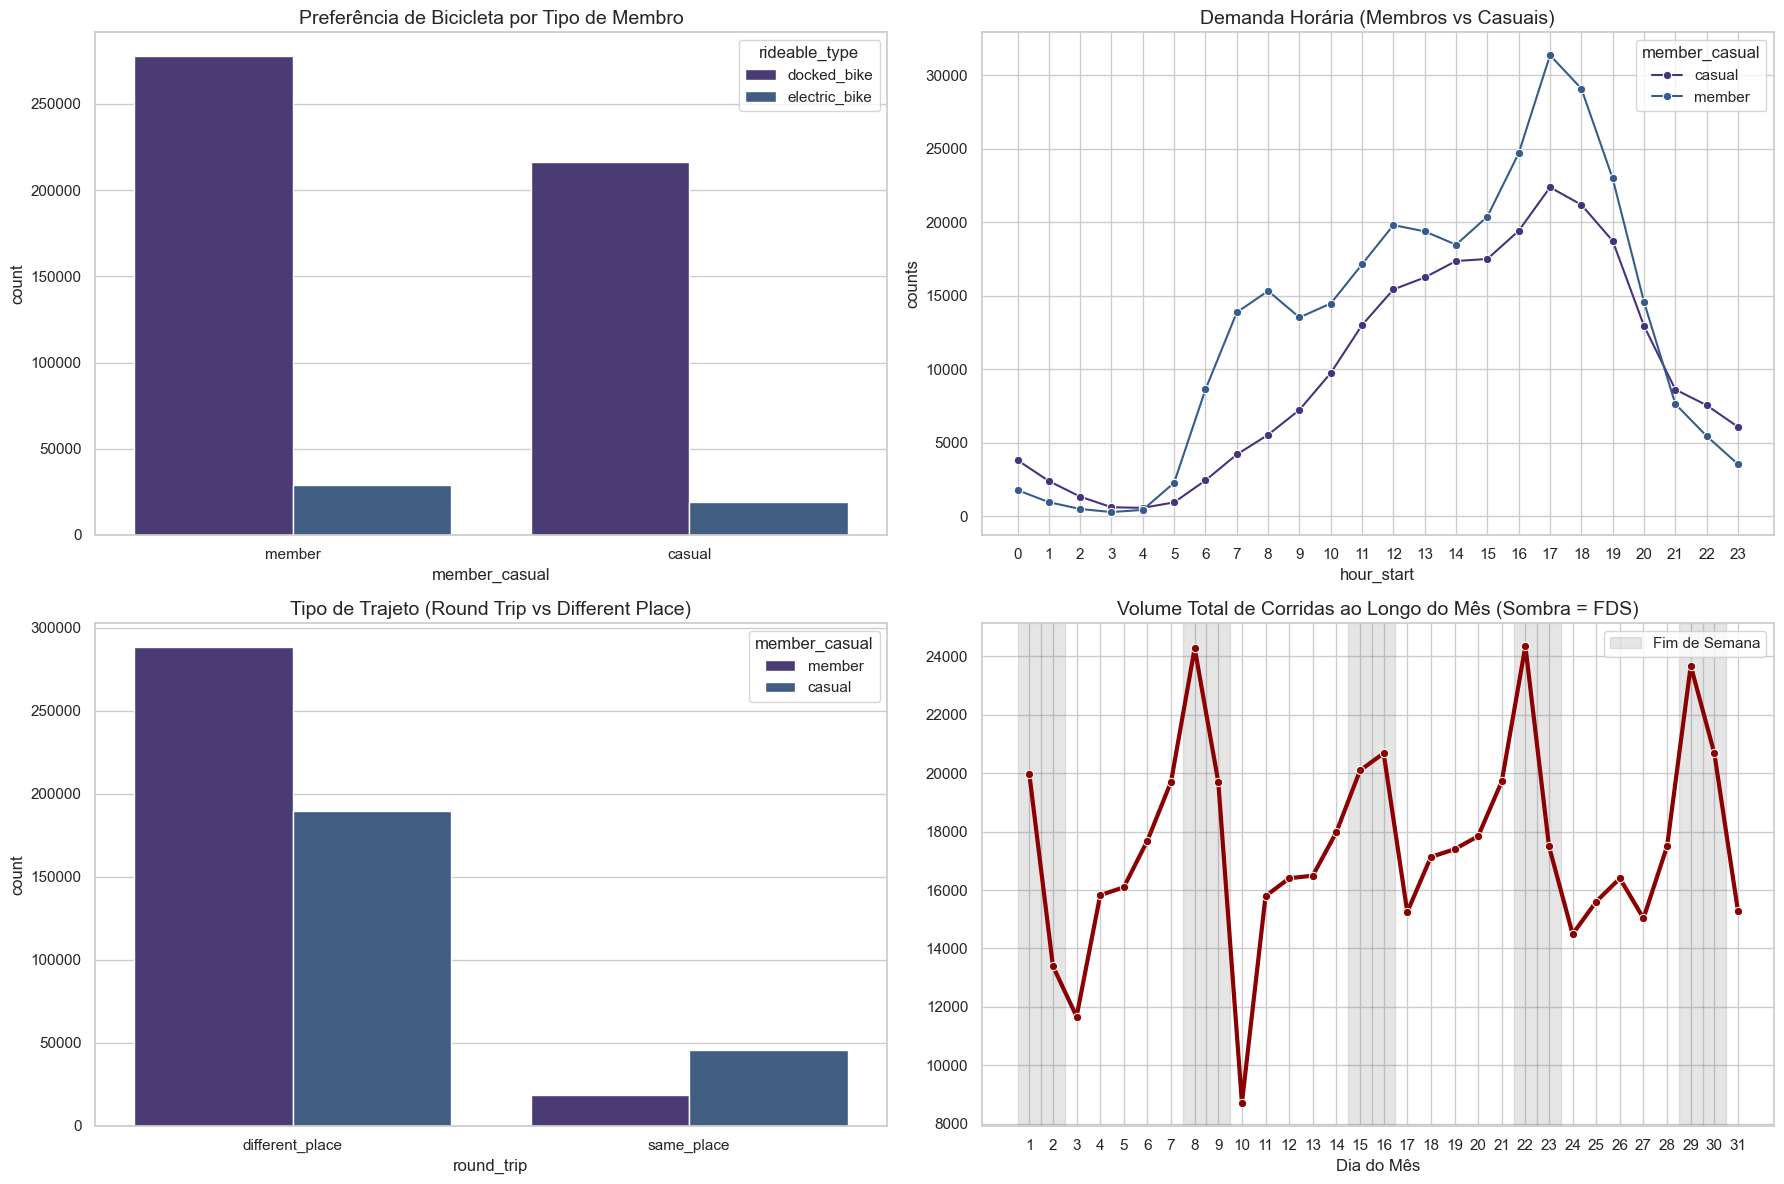

In [36]:
plot_distributions_and_volume(df)

In [37]:
def plot_performance_and_outliers(df):
    """Foco em Distância (KM), Duração e Outliers."""
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # 1. Relação KM vs Duração (Linha de Tendência)
    # Usamos lineplot com estimativa para não travar com 13k pontos
    sns.lineplot(data=df, x='distance_km', y='ride_duration_minutes', ax=axes[0, 0], color='teal')
    axes[0, 0].set_title('Relação: Distância (KM) vs Duração (Minutos)')

    # 2. KM por Tipo de Membro (Média)
    sns.barplot(data=df, x='member_casual', y='distance_km', ax=axes[0, 1], estimator=np.mean)
    axes[0, 1].set_title('Média de KM por Tipo de Membro')

    # 3. KM por Fim de Semana (is_weekend) dividido por Membro
    sns.barplot(data=df, x='is_weekend', y='distance_km', hue='member_casual', ax=axes[1, 0])
    axes[1, 0].set_title('Média de KM: Fim de Semana vs Dias Úteis')
    axes[1, 0].set_xticklabels(['Dia Útil', 'Fim de Semana'])

    # 4. Outliers de Duração e KM (Boxplots combinados)
    # Criamos um "melt" para colocar os dois no mesmo gráfico de eixos diferentes ou lado a lado
    # Aqui vamos de abordagem simples com boxplot de KM para não poluir
    sns.boxplot(data=df, x='member_casual', y='distance_km', ax=axes[1, 1])
    axes[1, 1].set_title('Distribuição e Outliers de Distância (KM)')

    plt.tight_layout()
    plt.show()

    # Gráfico extra para Outliers de Duração (separado para escala ser diferente)
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='member_casual', y='ride_duration_minutes', palette='Set2')
    plt.title('Outliers: Duração da Corrida (Minutos)')
    plt.show()

In [ ]:
plot_performance_and_outliers(df)

In [ ]:
def plot_correlation_heatmap(df):
    """Mapa de calor para entender correlações."""
    plt.figure(figsize=(10, 8))
    cols = ['ride_duration_minutes', 'distance_km', 'hour_start', 'is_weekend', 'hour_end']
    corr = df[cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Máscara para ver só metade (opcional)
    
    sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, fmt=".2f", linewidths=.5)
    plt.title('Heatmap de Correlação de Variáveis')
    plt.show()

In [ ]:
plot_correlation_heatmap(df)

In [ ]:
def plot_bike_analysis(df):
    # Configuração de estilo
    sns.set_theme(style="whitegrid")
    plt.rcParams['figure.figsize'] = (18, 12)
    
    # Criando o grid de subplots (4 linhas e 2 colunas)
    fig, axes = plt.subplots(4, 2)
    fig.suptitle('Análise Visual de Dados de Mobilidade', fontsize=20, fontweight='bold')

    # 1. Distribuição: Tipo de Usuário e Tipo de Bicicleta (Barra)
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 0])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')

    # 2. 
    sns.countplot(data=df, x='member_casual', hue='rideable_type', ax=axes[0, 1])
    axes[0, 0].set_title('Preferência de Bicicleta por Tipo de Membro')
    
    # 2. Outliers: Duração da Corrida (Boxplot)
    # Filtramos valores extremos para o gráfico não ficar ilegível
    sns.boxplot(data=df, x='member_casual', y='ride_duration_minutes', ax=axes[0, 1])
    axes[0, 1].set_title('Outliers: Duração da Corrida (min)')

    # 3. Demanda: Volume de corridas por Hora (Linha/Área)
    # Comparando quando membros vs casuais usam as bikes
    hourly_counts = df.groupby(['hour_start', 'member_casual']).size().reset_index(name='count')
    sns.lineplot(data=hourly_counts, x='hour_start', y='count', hue='member_casual', marker='o', ax=axes[1, 0])
    axes[1, 0].set_title('Volume de Corridas por Hora do Dia')
    axes[1, 0].set_xticks(range(0, 24))

    # 4. Comportamento: Round Trip vs Diferent Place (Barra)
    sns.countplot(data=df, x='round_trip', hue='member_casual', ax=axes[1, 1])
    axes[1, 1].set_title('Viagens de Ida e Volta vs Ponto a Ponto')

    # 5. Outliers: Distância percorrida (Boxplot)
    sns.boxplot(data=df, x='member_casual', y='distance_km', ax=axes[2, 0])
    axes[2, 0].set_title('Outliers: Distância Percorrida (km)')

    # 6. Heatmap de Correlação
    # Selecionamos apenas as colunas numéricas relevantes
    cols_corr = ['ride_duration_minutes', 'distance_km', 'hour_start', 'is_weekend']
    corr_matrix = df[cols_corr].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 1])
    axes[2, 1].set_title('Heatmap de Correlação entre Métricas')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
plot_bike_analysis(df)

## Análise das Estações

In [ ]:
def analise_estacoes_completa(df):
    print("=== 🚉 ANÁLISE ESTRATÉGICA DE ESTAÇÕES ===")
    
    # 1. Top 10 Estações de Início e Fim
    top_start = df['start_station_name'].value_counts().head(10)
    top_end = df['end_station_name'].value_counts().head(10)

    # 2. As Rotas Mais Frequentes (Caminho completo)
    # Criamos uma coluna temporária de rota para facilitar
    df['route'] = df['start_station_name'] + " ➔ " + df['end_station_name']
    top_routes = df['route'].value_counts().head(10)

    # 3. Análise de Fluxo (Balance)
    # Quantas saíram vs Quantas chegaram em cada estação
    starts = df['start_station_name'].value_counts()
    ends = df['end_station_name'].value_counts()
    
    flow = pd.DataFrame({'Saídas': starts, 'Chegadas': ends}).fillna(0)
    flow['Saldo'] = flow['Chegadas'] - flow['Saídas']
    # Estações que mais "perdem" bikes (Saldo negativo) e as que mais "ganham" (Saldo positivo)
    mais_ganham = flow.sort_values(by='Saldo', ascending=False).head(5)
    mais_perdem = flow.sort_values(by='Saldo', ascending=True).head(5)

    # --- VISUALIZAÇÃO ---
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Gráfico 1: Top Start Stations
    sns.barplot(y=top_start.index, x=top_start.values, ax=axes[0, 0], palette='viridis')
    axes[0, 0].set_title('Top 10 Estações de Partida')

    # Gráfico 2: Top End Stations
    sns.barplot(y=top_end.index, x=top_end.values, ax=axes[0, 1], palette='magma')
    axes[0, 1].set_title('Top 10 Estações de Chegada')

    # Gráfico 3: Rotas mais populares
    sns.barplot(y=top_routes.index, x=top_routes.values, ax=axes[1, 0], palette='rocket')
    axes[1, 0].set_title('Top 10 Rotas Mais Frequentes')

    # Gráfico 4: Saldo de Bicicletas (Top 5 Ganham vs Top 5 Perdem)
    balance_plot = pd.concat([mais_ganham, mais_perdem])
    sns.barplot(y=balance_plot.index, x=balance_plot['Saldo'], ax=axes[1, 1], palette='coolwarm')
    axes[1, 1].set_title('Saldo de Bikes (Chegadas - Saídas)')
    axes[1, 1].set_xlabel('Saldo Negativo = Estação esvaziando | Positivo = Acumulando')

    plt.tight_layout()
    plt.show()

    # Deletar a coluna temporária para não sujar o DF original
    df.drop(columns=['route'], inplace=True)

In [ ]:
analise_estacoes_completa(df)